In [1]:
import os,subprocess,sys

In [2]:
import numpy as np

%matplotlib notebook
# %matplotlib widget
import matplotlib.pyplot as plt


plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'

In [3]:
%%sh 
make

make: Nothing to be done for 'all'.


In [4]:
_cpp=subprocess.check_output(["./rdof.run"]).decode(sys.stdout.encoding)

In [5]:
logT=[]
rdofs=[]
FFANN_rdofs=[]

for _ in _cpp.split("\n")[1:-1]:
    tmp=_.split(',')
    logT.append(float(tmp[0]))
    rdofs.append( [float(tmp[1]),float(tmp[2])])
    FFANN_rdofs.append( [float(tmp[3]),float(tmp[4])])
    
logT=np.array(logT)
rdofs=np.array(rdofs)
FFANN_rdofs=np.array(FFANN_rdofs)

In [6]:
int(_cpp.split("\n")[0])

134456

<IPython.core.display.Javascript object>


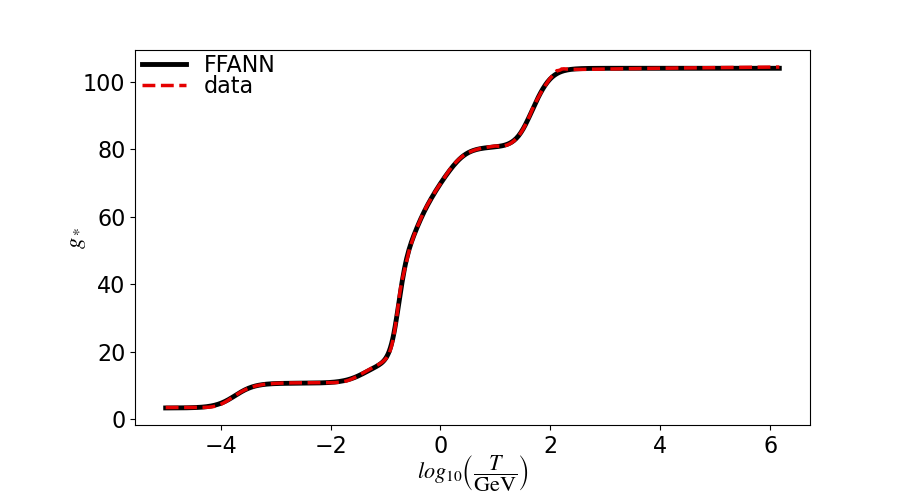

In [7]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)

sub.plot(logT,FFANN_rdofs[:,1],linestyle='-',linewidth=3.5,alpha=1,c='xkcd:black',label=r'FFANN')
sub.plot(logT,rdofs[:,1],linestyle='--',linewidth=2.5,alpha=1,c='xkcd:red',label=r'data')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$log_{10}\left( \dfrac{T}{{\rm GeV}} \right)$')
sub.xaxis.set_label_coords(0.5, -0.075) 
sub.set_ylabel(r'$g_{\rm *}$')
sub.yaxis.set_label_coords(-0.07,0.5) 


fig.show()

<IPython.core.display.Javascript object>


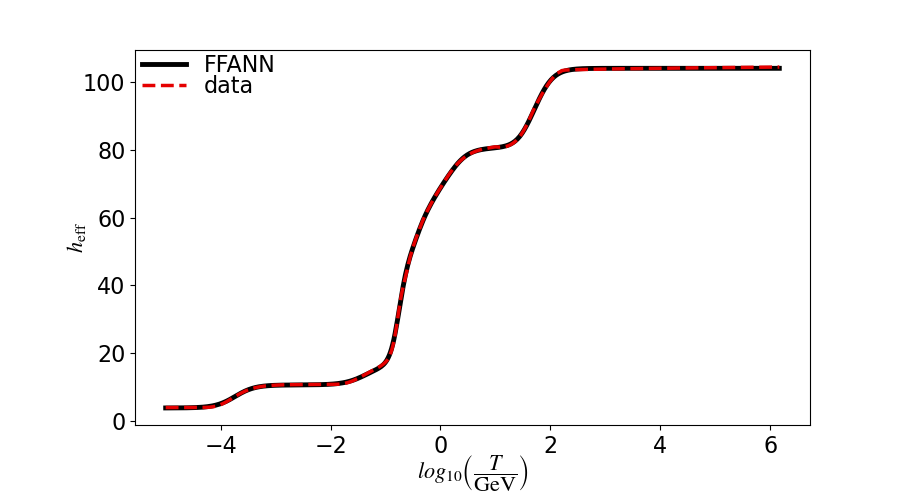

In [8]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)

sub.plot(logT,FFANN_rdofs[:,0],linestyle='-',linewidth=3.5,alpha=1,c='xkcd:black',label=r'FFANN')
sub.plot(logT,rdofs[:,0],linestyle='--',linewidth=2.5,alpha=1,c='xkcd:red',label=r'data')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$log_{10}\left( \dfrac{T}{{\rm GeV}} \right)$')
sub.xaxis.set_label_coords(0.5, -0.075) 
sub.set_ylabel(r'$h_{\rm eff}$')
sub.yaxis.set_label_coords(-0.07,0.5) 


fig.show()

<IPython.core.display.Javascript object>


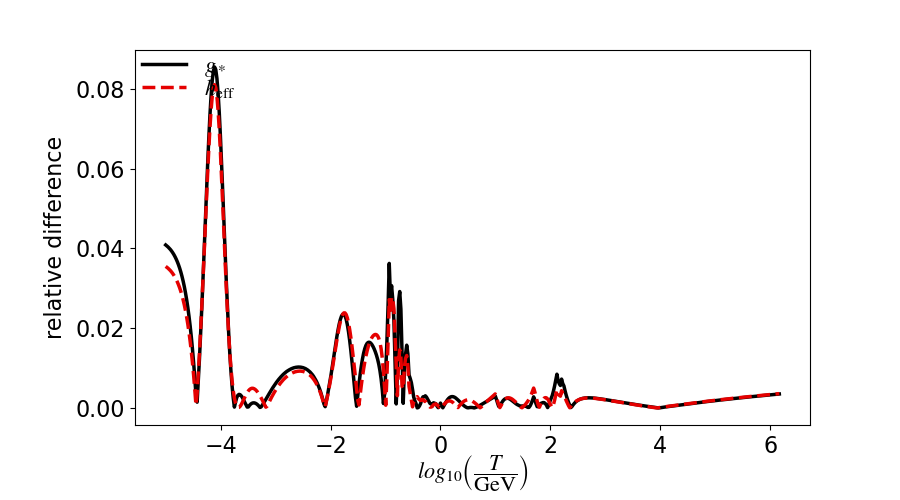

In [9]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)

    
sub.plot(logT,np.abs(FFANN_rdofs[:,1]-rdofs[:,1])/rdofs[:,1],linestyle='-',linewidth=2.5,alpha=1,c='xkcd:black',label=r'$g_{\rm *}$')
sub.plot(logT,np.abs(FFANN_rdofs[:,0]-rdofs[:,0])/rdofs[:,1],linestyle='--',linewidth=2.5,alpha=1,c='xkcd:red',label=r'$h_{\rm eff}$')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$log_{10}\left( \dfrac{T}{{\rm GeV}} \right)$')
sub.xaxis.set_label_coords(0.5, -0.075) 
sub.set_ylabel(r'relative difference')
sub.yaxis.set_label_coords(-0.1,0.5) 


fig.show()